In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('zbior_23.csv',encoding = 'utf8',sep=';')
X = df[['M_C', 'M_A', 'SYM', 'P', 'T']].values
y = df[['EXP U']].values


In [3]:
'''Przygotowanie danych - podzielenie danych na zbiór trenujacy i testowy'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.4, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(1719, 5)
(1719, 1)
Test shapes
(1146, 5)
(1146, 1)


In [4]:
# Skalowanie cech dla lepszej wydajności modelu SVR
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

# SVR z jądrem liniowym

In [6]:
svr_model = SVR()

In [7]:
svr_model.fit(X_train, y_train)

SVR()

In [8]:
y_pred = svr_model.predict(X_test)

In [9]:
y_pred

array([1320.97332449, 1460.77356984, 1495.28850509, ..., 1488.69214261,
       1538.76292994, 1450.36379954])

In [10]:

r2 = r2_score(y_test, y_pred)
print(f"Współczynnik determinacji R^2: {r2}")

Współczynnik determinacji R^2: 0.662744887189445


In [11]:
specific_params = [[62.061, 73.071, 0, 0.1, 298.15],  # Przykładowe konkretne parametry
                   [125.190, 125.124, 1, 100.0, 303.15]]  # Kolejne przykładowe konkretne parametry
specific_params_scaled = scaler.transform(specific_params)

In [12]:
predictions = svr_model.predict(specific_params_scaled)

In [13]:
for i, params in enumerate(specific_params):
    print(f"Dla parametrów {params} przewidywana wartość Rho: {predictions[i]}")

Dla parametrów [62.061, 73.071, 0, 0.1, 298.15] przewidywana wartość Rho: 1555.1886675361911
Dla parametrów [125.19, 125.124, 1, 100.0, 303.15] przewidywana wartość Rho: 1554.874703672898


# Jądra różne

## Liniowy 

In [14]:
svr_linear = SVR(kernel='linear')

In [15]:
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)
y_pred
r2 = r2_score(y_test, y_pred_linear)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_pred_linear)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.8579541708436698
Błąd średniokwadratowy MSE: 4665.925303408581


## Wielomianowy

In [16]:
svr_poly = SVR(kernel='poly',degree=2)
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)
y_pred_poly
r2 = r2_score(y_test, y_pred_poly)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_pred_poly)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.1396834091436474
Błąd średniokwadratowy MSE: 28259.70304134038


## Radialna funkcja bazowa RBF 

In [17]:
svr_rbf = SVR(kernel='rbf',gamma=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf
r2 = r2_score(y_test, y_pred_rbf)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_pred_rbf)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.6686469130548031
Błąd średniokwadratowy MSE: 10884.295314567758


## Jądro sigmoidalne 

In [18]:
svr_sigmoid = SVR(kernel='sigmoid',gamma=0.3)
svr_sigmoid.fit(X_train, y_train)
test_predictions_sigmoid = svr_sigmoid.predict(X_test)
# y_pred_sigmoid

###Metryki błędu dla zbioru testowego
r2 = r2_score(y_test, test_predictions_sigmoid)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, test_predictions_sigmoid)
print(f"Błąd średniokwadratowy MSE: {mse}")
###Metryki błędu dla zbioru treningowego
train_predictions_sigmoid =svr_sigmoid.predict(X_train)
r2_train = r2_score(y_train, train_predictions_sigmoid)
print(f"Współczynnik determinacji R^2: {r2_train}")
mse_train = mean_squared_error(y_train, train_predictions_sigmoid)
print(f"Błąd średniokwadratowy MSE: {mse_train}")

Współczynnik determinacji R^2: 0.7426289459214919
Błąd średniokwadratowy MSE: 8454.131463925014
Współczynnik determinacji R^2: 0.7310479483586687
Błąd średniokwadratowy MSE: 9561.540222745532


In [19]:
test_predictions_sigmoid.shape

(1146,)

In [19]:
from sklearn.model_selection import cross_val_score
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores_test = cross_val_score(svr_sigmoid, X_test, y_test, cv=25, scoring='r2')
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2_test = cv_scores_test.mean()
print("Średni R^2 po walidacji krzyżowej:", mean_r2_test)

Średni R^2 po walidacji krzyżowej: 0.7370603640228763


In [20]:
test_predictions_sigmoid = pd.Series(test_predictions_sigmoid)
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])
pred_df = pd.concat([pred_df,test_predictions_sigmoid],axis = 1)
pred_df.columns = ['Test true y', 'Pred']


In [21]:
train_predictions_sigmoid = pd.Series(train_predictions_sigmoid)
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])
train_df = pd.concat([train_df,train_predictions_sigmoid],axis = 1)
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

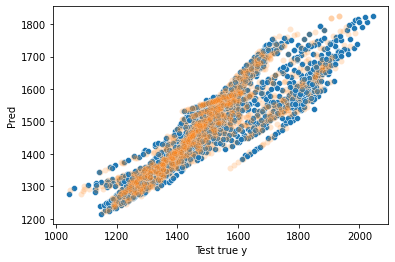

In [22]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [44]:
'''Zrób jutro coś podobnego :) dla train df i uporządkuj dane! 
Stwórz funkcję iterującą jak w przypadku sieci neuronowej
Zmień nazwy zmiennych'''

'Zrób jutro coś podobnego :) dla train df i uporządkuj dane! '

In [23]:
train_df

,Test true y,Pred
0,1613.37,1597.470821
1,1314.90,1325.005837
2,1800.81,1565.922140
3,1267.31,1292.942903
4,1582.90,1577.720055
...,...,...
1714,1377.30,1372.576536
1715,1360.43,1381.351849
1716,1246.87,1297.804232
1717,1557.03,1602.330261


In [24]:
pred_df

,Test true y,Pred
0,1252.40,1284.149214
1,1525.30,1456.959751
2,1481.59,1498.278180
3,1410.40,1372.679436
4,1537.50,1537.433095
...,...,...
1141,1485.86,1508.547280
1142,1309.19,1328.744344
1143,1471.30,1436.781678
1144,1485.40,1554.194487


# Zapis zbiorów do pliku

In [25]:
import os
directory_path = 'D:/PhD/ML/SVR/U'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# train_df.to_csv(os.path.join(directory_path, 'train_set_sigmoid_U.csv'), sep=';', encoding='utf-8')
# pred_df.to_csv(os.path.join(directory_path, 'test_set_sigmoid_U.csv'), sep=';', encoding='utf-8')    

# Licz dla konkretnej cieczy jonowej

In [28]:
def predictions3(MC,MA,SYM,P,T):
    res = []
    for j in T:
        for i in P:
            new_geom = [[MC,MA,SYM,i,j]]
            new_geom = scaler.transform(new_geom)
            res.append(svr_sigmoid.predict(new_geom))
            #print(model.predict(new_geom))
    return res

In [32]:
nazwa = 'C4Py_NTF2_1'
Mcat = 136.214
Man = 280.146

P = [0.101,15.2,30.39,44.68,56.77,60.79,75.99,91.18,101.32]
T = [293.15,298.15,303.15,308.15,313.15,318.15,323.15]
result = predictions3(Mcat,Man,0,P,T);

In [33]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
for i in res_numerical:
    print(i)

1314.472292024451
1339.070462946157
1366.818719149341
1395.7265569375486
1422.0471019215152
1431.099846260558
1466.222081427893
1501.9309181132633
1525.6576307442695
1301.8638182347677
1327.2858388014843
1356.1005941645221
1386.1648711692035
1413.5100813470256
1422.9020842443012
1459.2632343563153
1496.1062223013569
1520.519292249883
1289.5302179518185
1315.7646102976348
1345.6244440383198
1376.8022372076716
1405.1139589165298
1414.8218383222895
1452.3201334910236
1490.1813416066193
1515.197631182922
1277.6477048817592
1304.6595276335474
1335.5074192943646
1367.713561032554
1396.894773420772
1406.882161948326
1445.3681652779183
1484.0881460482776
1509.5994790619138
1266.4037250613892
1294.1339793520194
1325.873099280921
1358.974661244963
1388.8851405611056
1399.1014695868682
1438.3750408465933
1477.7513862400483
1503.6274866175957
1255.979520350847
1284.3468210052527
1316.8404707127675
1350.6566591399442
1381.1139238646856
1391.4950328383018
1431.3092642950492
1471.1036446394678
1497.1

In [34]:
import os
directory_path = 'D:/PhD/ML/SVR/U/'
directory_path + nazwa 
tablica_danych = np.array(res_numerical).reshape(len(T), len(P))
dane = pd.DataFrame(tablica_danych)
dane = dane.T
dane.to_excel(directory_path+nazwa+'_U_DATA.xlsx', index=False)

'D:/PhD/ML/SVR/U/C4C1Pyr_NTF2_3M'